
## Applying Machine Learning Models to predict Revenue for 2011 using data from 2010

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
path_train_data = "/content/drive/My Drive/Data/TrainData.xlsx"
path_test_data = "/content/drive/My Drive/Data/TestData.xlsx"

The data has been already split into Train and Test set in the data preparation notebook

**Loading the Train and Test data**

In [0]:
train_data = pd.read_excel(path_train_data,sheet_name=0, index_col=0)
test_data = pd.read_excel(path_test_data,sheet_name=0, index_col=0)

In [25]:
train_data.head()

,CustomerID,Month,InvoiceTotal
0,12346,3,135.25
1,12346,6,2703.89
2,12347,10,24461.20
3,12347,12,22065.49
4,12348,9,4202.04


In [26]:
train_data.describe()

,CustomerID,Month,InvoiceTotal
count,12101.000000,12101.000000,1.210100e+04
mean,15330.329064,6.908768,2.000463e+04
std,1690.818634,3.320974,7.696730e+04
min,12346.000000,1.000000,1.250000e+00
25%,13870.000000,4.000000,2.449800e+03
50%,15317.000000,7.000000,6.282000e+03
75%,16785.000000,10.000000,1.585969e+04
max,18287.000000,12.000000,4.298778e+06


In [27]:
test_data.describe()

,CustomerID,Month,InvoiceTotal
count,12140.000000,12140.000000,1.214000e+04
mean,15262.256755,6.957166,2.263105e+04
std,1725.336513,3.323730,1.496344e+05
min,12346.000000,1.000000,0.000000e+00
25%,13781.750000,4.000000,2.300127e+03
50%,15209.000000,7.000000,6.056295e+03
75%,16759.500000,10.000000,1.549283e+04
max,18287.000000,12.000000,1.104364e+07


In [28]:
train_data.Month.value_counts()

11    1606
10    1492
9     1136
3     1051
6     1034
5      965
4      939
7      924
8      910
2      771
1      701
12     572
Name: Month, dtype: int64

Text(0.5, 1.0, 'Revenue per Customer per Month in Year 2010')

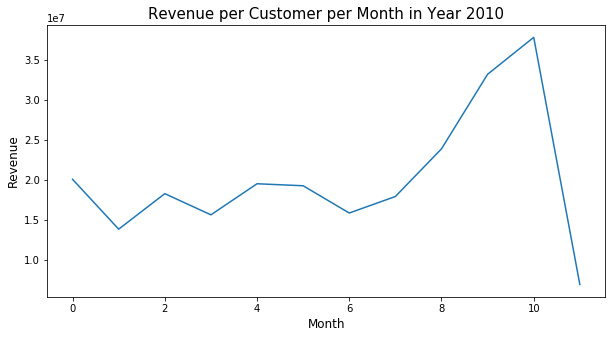

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
TotalPerMonth = train_data.groupby(['Month'], as_index=False)['InvoiceTotal'].sum()
plt.plot(TotalPerMonth.InvoiceTotal)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue per Customer per Month in Year 2010', fontsize=15) 

Highest revenue is generated during the months of October to November

Text(0.5, 1.0, 'Revenue per Customer per Month in Year 2011')

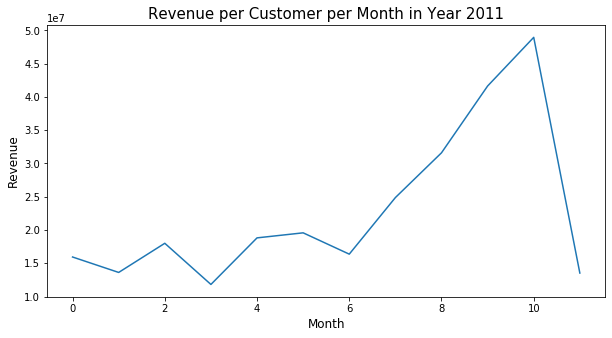

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
TotalPerMonth = test_data.groupby(['Month'], as_index=False)['InvoiceTotal'].sum()
plt.plot(TotalPerMonth.InvoiceTotal)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue per Customer per Month in Year 2011', fontsize=15) 

In [31]:
test_data.head()

,CustomerID,Month,InvoiceTotal
0,12346,1,77183.60
1,12347,1,13786.31
2,12347,4,15270.00
3,12347,6,6885.36
4,12347,8,12868.02


**Separate Target from features**

In [0]:
target = 'InvoiceTotal'
features = list(train_data.columns)
features = [f for f in features if f!=target]

In [0]:
X_tr = train_data[features]
y_tr = train_data[[target]]

X_te = test_data[features]
y_te = test_data[[target]]

**Prepare to compare models**

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

## **Fit different regression models to compare**

**Linear Regression**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
#Predict on Test data
y_pred_lin = lin_reg.predict(X_te)
#view result using mean squared error
lin_mse = mean_squared_error(y_te, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)

print("Root Mean Squared Error: " + str(lin_rmse))

Root Mean Squared Error: 149571.02653837003


**Decision Tree Regressor**

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_tr, y_tr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [48]:
y_pred_tree = tree_reg.predict(X_te)
tree_mse = mean_squared_error(y_te, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)

print("Root Mean Squared Error: " + str(tree_rmse))

Root Mean Squared Error: 149436.52269403875


### **Using Grid Search CV to compare Ridge, Lasso and ElasticNet Regression**

**Ridge Regression**

In [49]:
from sklearn.linear_model import Ridge

param_grid = [{'alpha': [0.001,0.01,0.1,1]}]
grid_search_rr = GridSearchCV(Ridge(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_tr, y_tr)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [50]:
print(grid_search_rr.best_params_)
print(np.sqrt(-grid_search_rr.best_score_))

{'alpha': 1}
76939.08364943376


**Lasso Regression**

In [51]:
from sklearn.linear_model import Lasso

param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000]}]
grid_search_lr = GridSearchCV(Lasso(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_tr, y_tr)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [52]:
print(grid_search_lr.best_params_)
print(np.sqrt(-grid_search_lr.best_score_))

{'alpha': 1000}
76935.25236811649


**ElasticNet Regression**

In [53]:
from sklearn.linear_model import ElasticNet

param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000],
               'l1_ratio': [0.2, 0.5, 0.8]}]
               
grid_search_enr = GridSearchCV(ElasticNet(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_enr.fit(X_tr, y_tr)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000],
                          'l1_ratio': [0.2, 0.5, 0.8]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [54]:
print(grid_search_enr.best_params_)
print(np.sqrt(-grid_search_enr.best_score_))

{'alpha': 1000, 'l1_ratio': 0.2}
76931.75240483589


## Evaluating best model on Test data

In [0]:
grid_search = grid_search_enr

In [56]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

y_te_estimation = final_model.predict(X_te)

final_mse = mean_squared_error(y_te, y_te_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

149575.65935724293


In [57]:
# Training rmse for comparison
y_tr_estimation = final_model.predict(X_tr)
train_mse = mean_squared_error(y_tr, y_tr_estimation)
print(np.sqrt(train_mse))

76910.55547063409


Assuming that predicted InvoiceTotal values are in order, we'll combine it with other Test features such as Month and view graphically the Predicted Revenue per month

In [58]:
type(y_te_estimation)

numpy.ndarray

In [0]:
y_est = pd.DataFrame(y_te_estimation)

In [60]:
y_est.head()

,0
0,25067.558571
1,25065.861131
2,25067.279670
3,25068.225363
4,25069.171055


In [0]:
final_df = pd.concat([X_te, y_est], axis=1, sort=False)

In [62]:
final_df.head()

,CustomerID,Month,0
0,12346,1,25067.558571
1,12347,1,25065.861131
2,12347,4,25067.279670
3,12347,6,25068.225363
4,12347,8,25069.171055


In [0]:
final_df = final_df.rename(columns={0: "Estimated_InvoiceTotal"})

Text(0.5, 1.0, 'Revenue predicted for Year 2011')

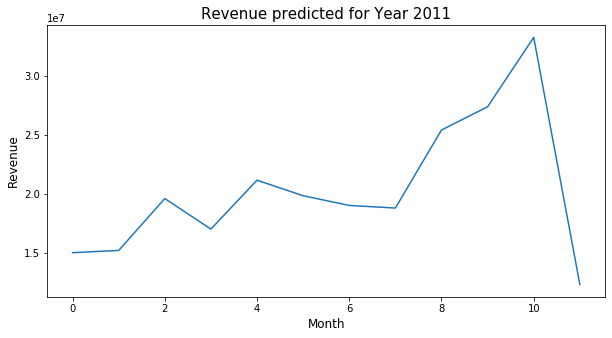

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
TotalPerMonth = final_df.groupby(['Month'], as_index=False)['Estimated_InvoiceTotal'].sum()
plt.plot(TotalPerMonth.Estimated_InvoiceTotal)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue predicted for Year 2011', fontsize=15)

# **Conclusions**

1. Decision Tree Regressor performed slightly better than other models
2. It can be seen that there is high variance between the Train and Test RMSE values
3. Looks like the models are overfitting the Train data